# Stellar EOS

A stellar equation of state describing a multi-component plasma (ions, electrons, and radiation) is available
via the {py:obj}`StellarEOS <pynucastro.eos.stellar_eos.StellarEOS>` class.

```{note}
Presently, the equation of state does not include Coulomb corrections.
```

In [1]:
import pynucastro as pyna

## Computing a thermodynamic state

In [2]:
eos = pyna.StellarEOS()

In [3]:
comp = pyna.Composition(["he4"])
comp.set_equal()

In [4]:
rho = 1.e-2
T = 1.e9

In [5]:
state = eos.pe_state(rho, T, comp)
print(state)

η     =     -5.92989
n_ele =  5.42942e+26 ; n_pos =  5.42939e+26

p     =  2.67189e+21 ; e     =  8.71999e+23

∂p/∂ρ =  2.07863e+16 ; ∂p/∂T =  1.13919e+13
∂e/∂ρ = -8.71999e+25 ; ∂e/∂T =  3.94432e+15

cᵥ    =  3.94432e+15 ; cₚ    =  6.24331e+22
Γ₁    =  1.2314



We see at these conditions, there is a lot of positron production.

## Exploring stability

A star is unstable if the adiabatic index, $\Gamma_1$, drops below 4/3.  We can map out the region in the thermodynamic plane where this happens.

In [6]:
import numpy as np

In [7]:
Ts = np.logspace(5, 10, 36)
rhos = np.logspace(-2, 9, 67)

In [8]:
Ts

array([1.00000000e+05, 1.38949549e+05, 1.93069773e+05, 2.68269580e+05,
       3.72759372e+05, 5.17947468e+05, 7.19685673e+05, 1.00000000e+06,
       1.38949549e+06, 1.93069773e+06, 2.68269580e+06, 3.72759372e+06,
       5.17947468e+06, 7.19685673e+06, 1.00000000e+07, 1.38949549e+07,
       1.93069773e+07, 2.68269580e+07, 3.72759372e+07, 5.17947468e+07,
       7.19685673e+07, 1.00000000e+08, 1.38949549e+08, 1.93069773e+08,
       2.68269580e+08, 3.72759372e+08, 5.17947468e+08, 7.19685673e+08,
       1.00000000e+09, 1.38949549e+09, 1.93069773e+09, 2.68269580e+09,
       3.72759372e+09, 5.17947468e+09, 7.19685673e+09, 1.00000000e+10])

In [9]:
gamma1 = np.zeros((len(rhos), len(Ts)))

In [10]:
for ir, rho in enumerate(rhos):
    for it, T in enumerate(Ts):
        state = eos.pe_state(rho, T, comp)
        gamma1[ir, it] = state.gamma1


In [11]:
import matplotlib.pyplot as plt
from matplotlib import colors

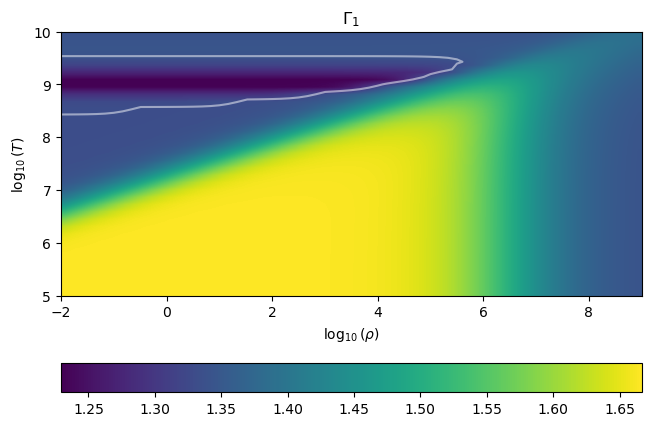

In [12]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(gamma1.T, origin="lower",
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bilinear")
ax.contour(np.log10(rhos), np.log10(Ts), gamma1.T, levels=[4./3.],
           colors="white", alpha=0.5)
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$\Gamma_1$")
fig.colorbar(im, ax=ax, orientation="horizontal")